In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
prices = data[['Open']].values

In [3]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices)

In [4]:
X, y = [], []
for i in range(60, len(scaled)):
    X.append(scaled[i-60:i])
    y.append(scaled[i])
X, y = np.array(X), np.array(y)

In [5]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)

C:\Users\Netra\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0443
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.4599e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.7161e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.8843e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.0744e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0427e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.5845e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0988e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4807e-04


In [8]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
total = pd.concat((data['Open'], test_data['Open']), axis=0)
inputs = total[len(total)-len(test_data)-60:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [9]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)


In [10]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


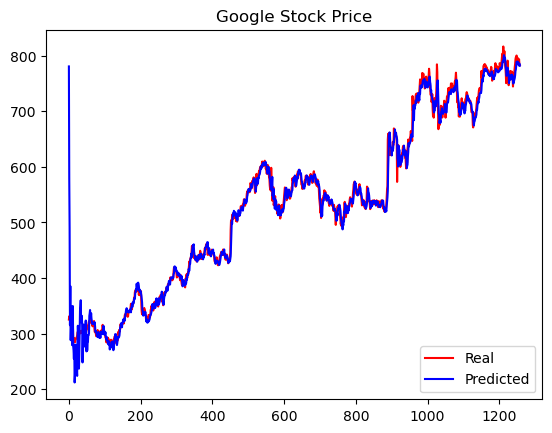

In [11]:
plt.plot(test_data['Open'].values, color='red', label='Real')
plt.plot(predicted, color='blue', label='Predicted')
plt.title('Google Stock Price')
plt.legend()
plt.show()
